In [1]:
from keras.preprocessing.image import random_rotation, random_shift, random_zoom

Using TensorFlow backend.


In [66]:
# Load pickled data
import pickle, os

data_path = './traffic-signs-data'
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(data_path, 'train.p')
validation_file=os.path.join(data_path, 'valid.p')
testing_file = os.path.join(data_path, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [1]:
from progress.bar import Bar

bar = Bar('Processing', max=20)
for i in range(20):
    # Do some work
    bar.next()
bar.finish()

In [67]:
X_train_ = X_train.astype('float32')

In [4]:
import numpy as np

In [10]:
coefs = np.random.choice(len(X_train), 1, replace=False)
test_X = X_train[coefs]
test_y = y_train[coefs]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [37]:
DEG_RANGE = 20
WRG = 0.2
HRG = 0.2
ZOOM_RANGE = (1.1, 1.1)
mode='reflect'

X_aug = None
y_aug = None


for _ in range(9):
    for X, y in zip(test_X, test_y):
        #x_cvt = random_rotation(X, DEG_RANGE)
        #x_cvt = random_shift(x_cvt, WRG, HRG, fill_mode=mode)
        x_cvt = random_zoom(x_cvt, ZOOM_RANGE)
        if X_aug is None:
            X_aug = x_cvt[np.newaxis]
        else:
            X_aug = np.vstack([X_aug, x_cvt[np.newaxis]])
        if y_aug is None:
            y_aug = y
        else:
            y_aug = np.append(y_aug, y)

In [38]:
X_aug = np.vstack([test_X, X_aug])

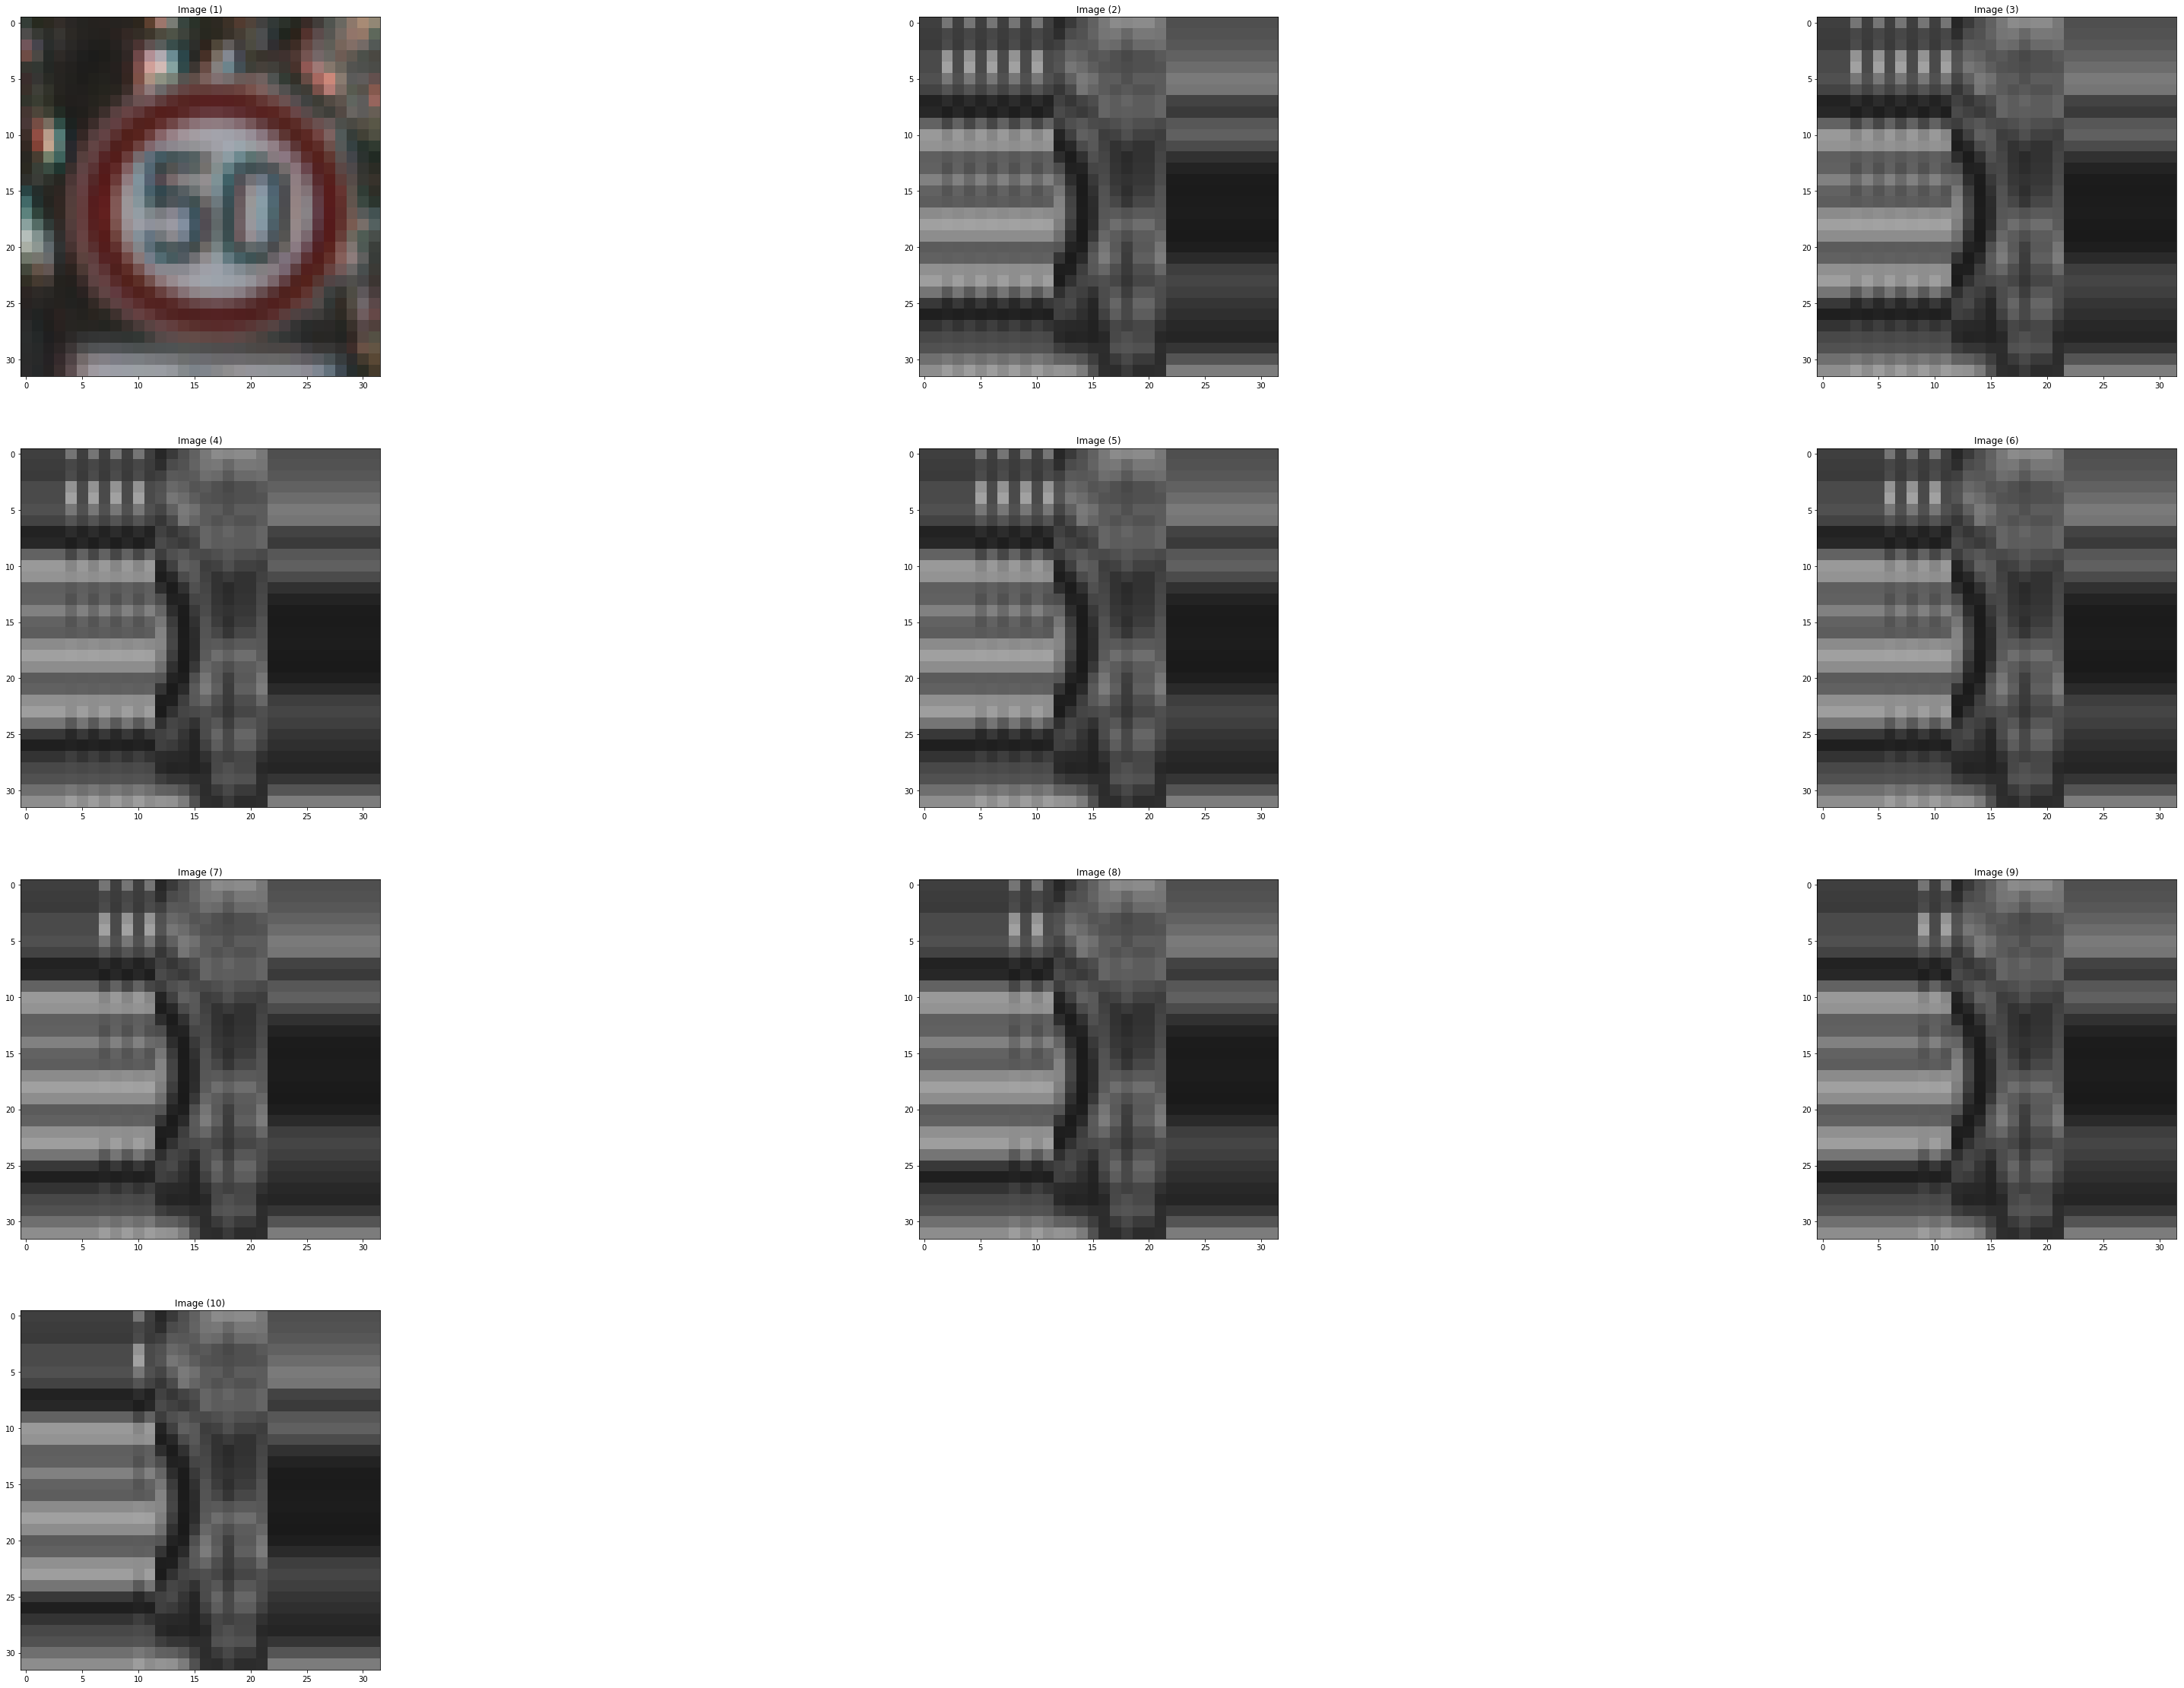

In [39]:
show_images(X_aug, cols=4)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

In [218]:
gen = ImageDataGenerator(zoom_range=0.1, rotation_range=20, height_shift_range=0.1, width_shift_range=0.1)

In [219]:
aug_X, aug_y = next(gen.flow(X_train_, y_train, batch_size=20))

In [236]:
np.mean(aug_X, axis=(1,2,3), keepdims=True).shape

(20, 1, 1, 1)

In [233]:
aug_X_2 = (aug_X.astype('float32')-np.mean(aug_X, axis=(1,2,3)).reshape(-1,1,1,1))
aug_X = aug_X.astype('uint8')

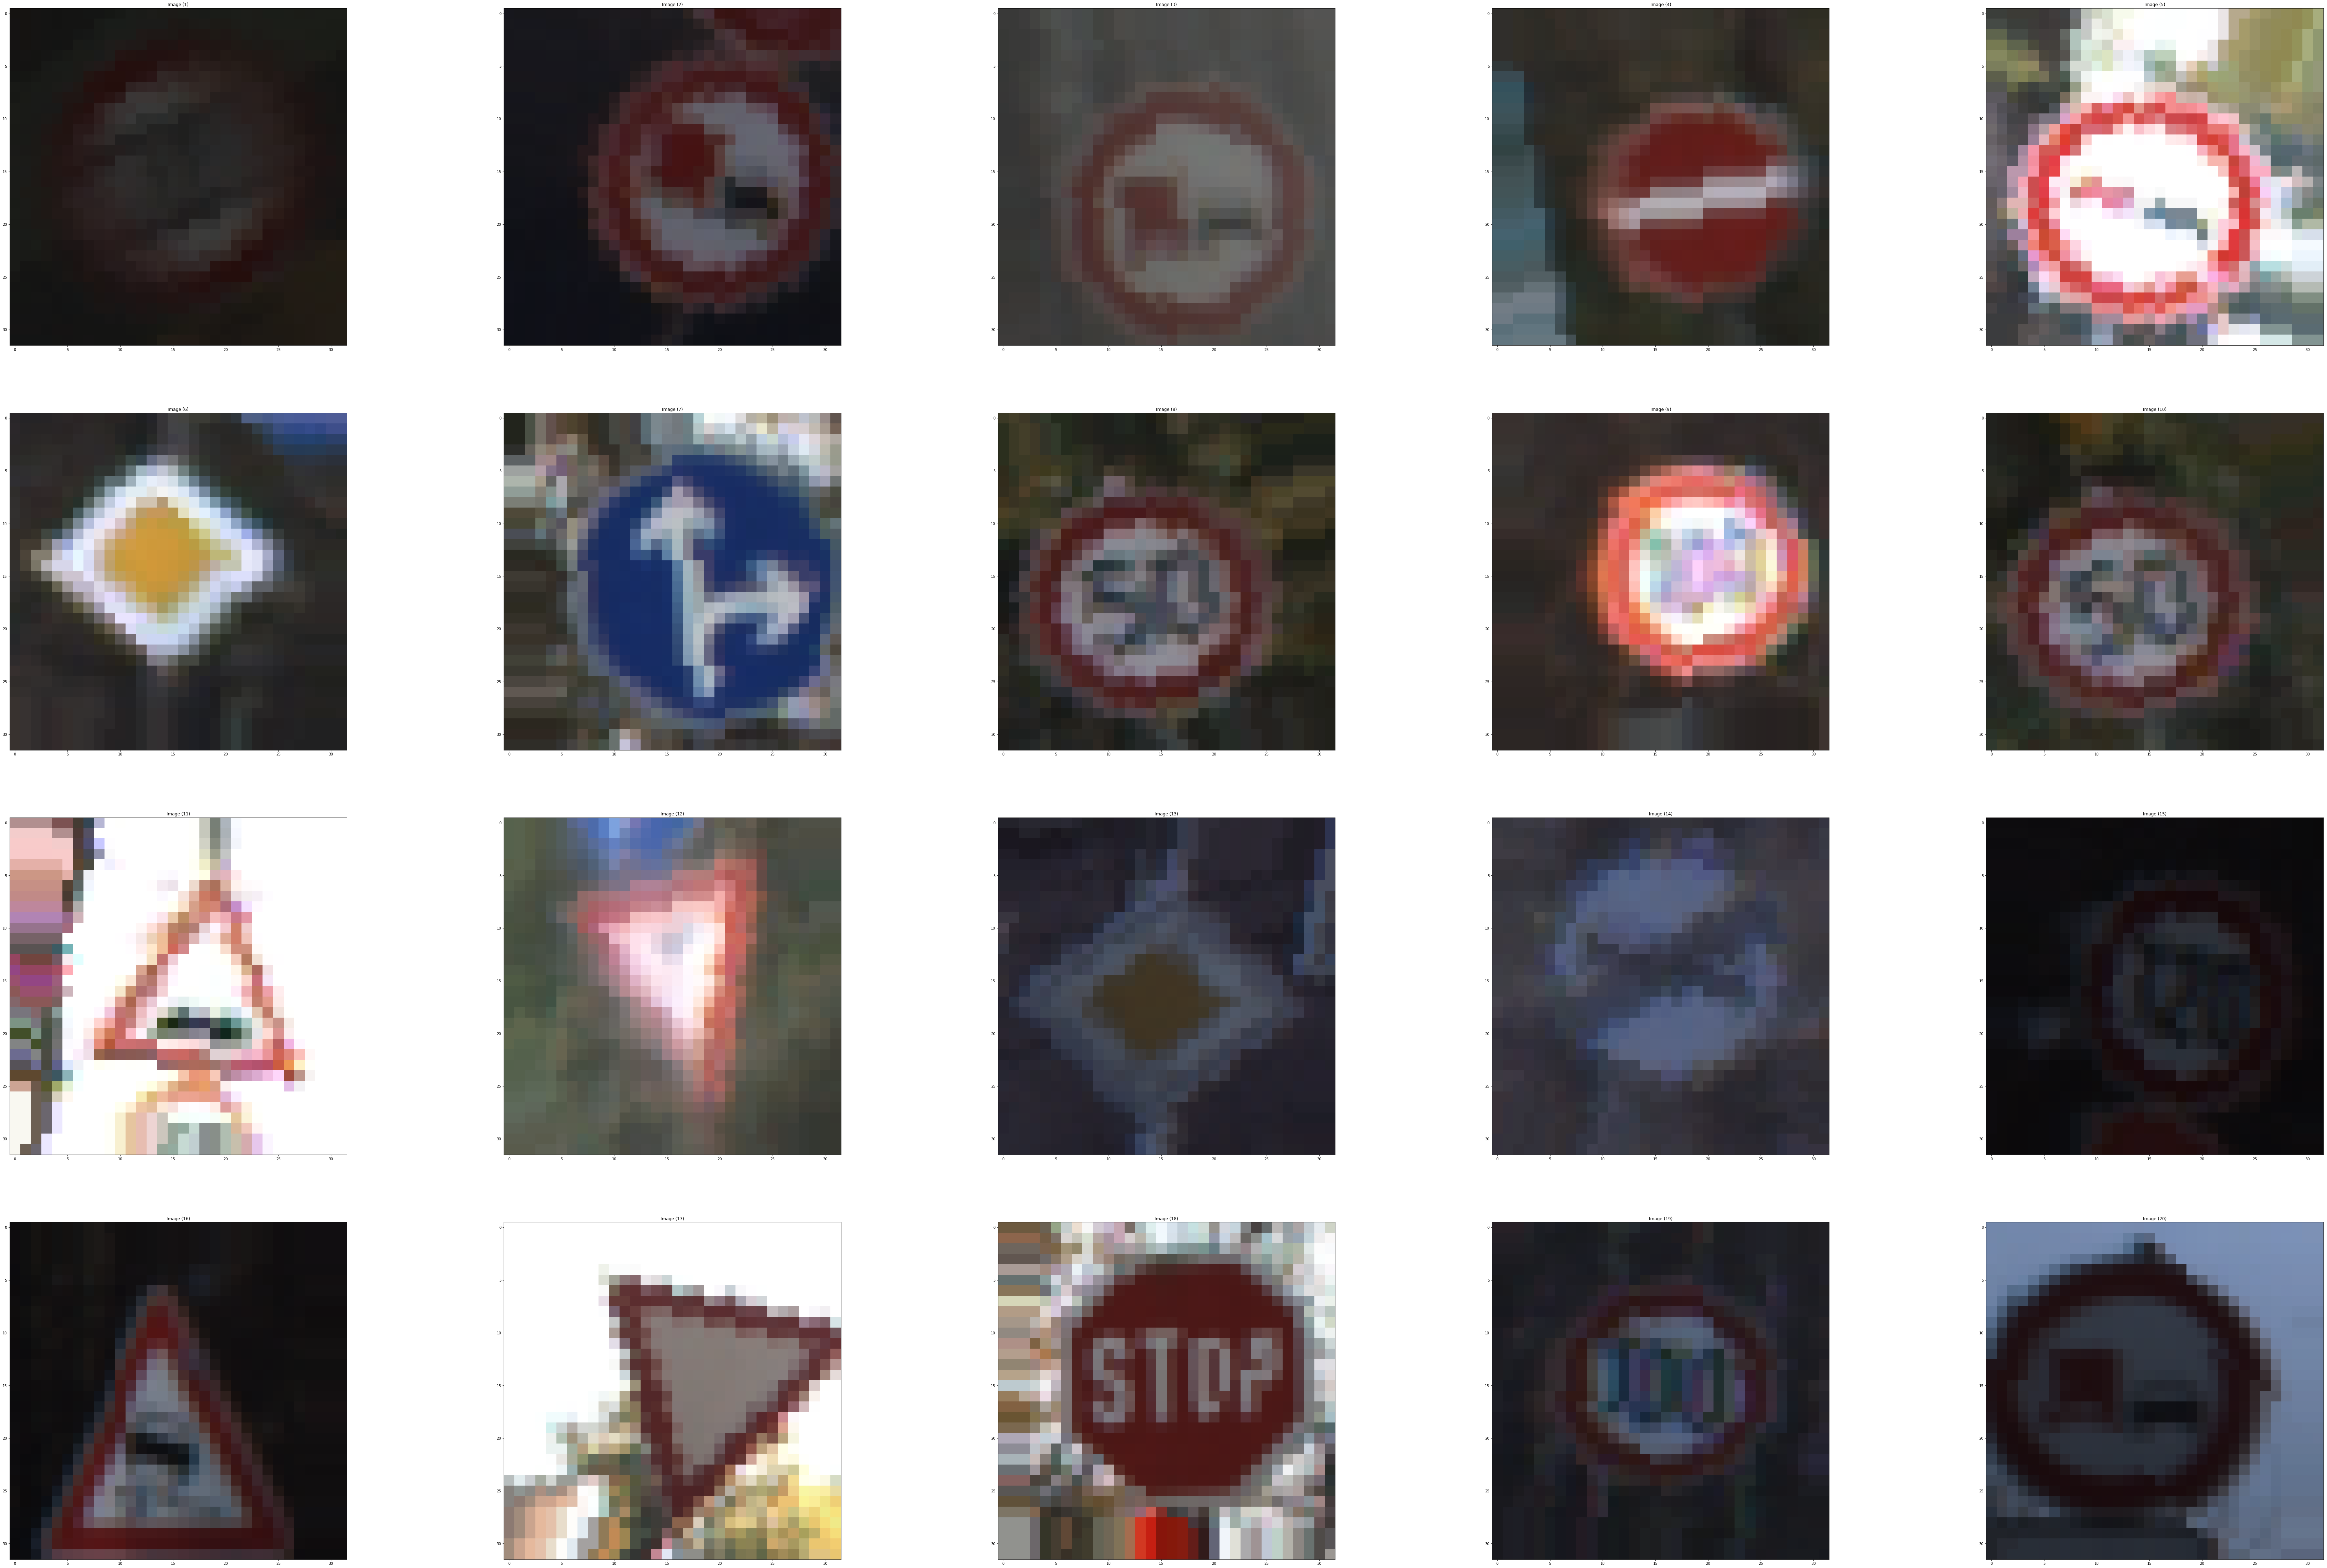

In [224]:
show_images(aug_X, cols=4)

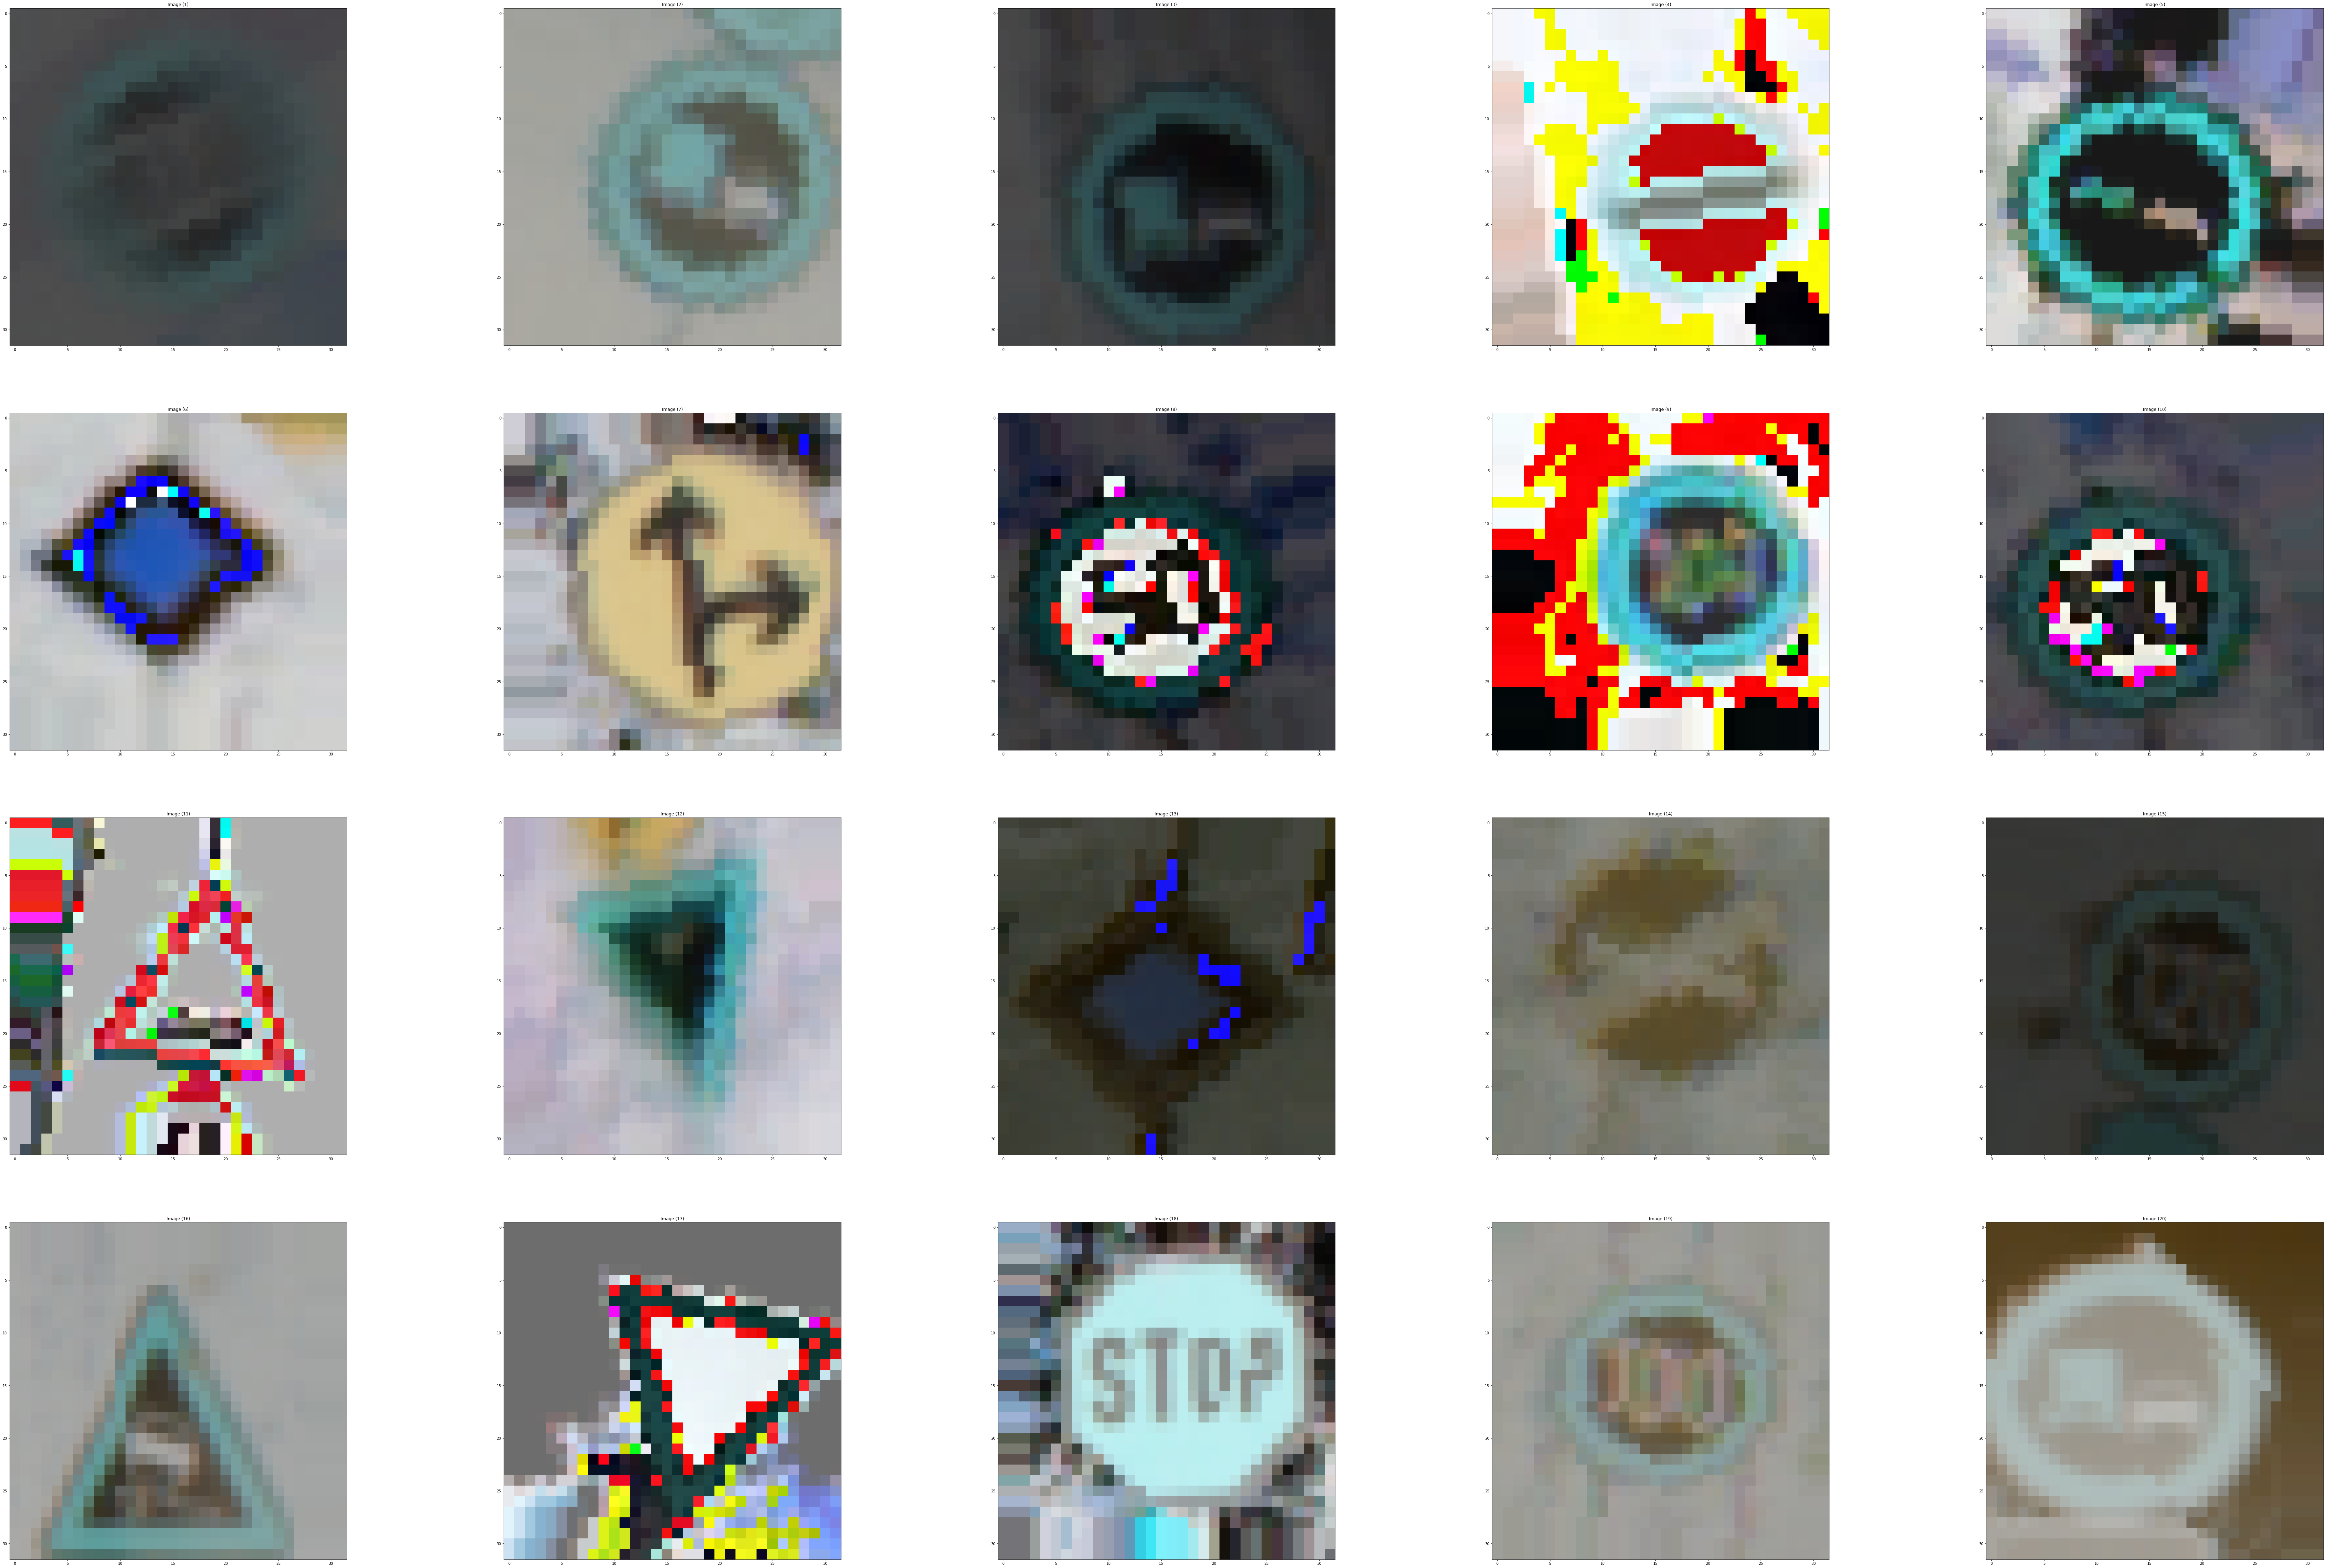

In [234]:
show_images(aug_X_2, cols=4)

In [174]:
means=np.mean(aug_X, axis=(1,2,3))

In [177]:
means = means.reshape(-1,1,1,1)
means.shape

(20, 1, 1, 1)

In [178]:
zero_centered_X = aug_X.astype('float32') - means

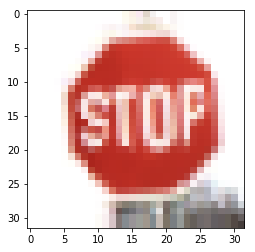

In [210]:
plt.imshow(aug_X[0])

In [207]:
normalized = ((aug_X.astype('float32') - 128)/128)

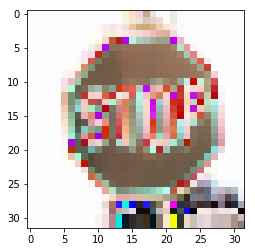

In [208]:
plt.imshow(normalized[0])

In [209]:
np.min(normalized), np.max(normalized)

(-0.9921875, 0.9921875)

In [239]:
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

In [240]:
for i in range(11):
    aug_X, aug_y = next(gen.flow(X_train_, y_train, batch_size=10))